In [1]:
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
def load_images_as_array(path_to_dir, suffix='.png'):
    '''Returns images in the given directory (based on the suffix) as numpy array'''
    images = []

    for filename in os.listdir(path_to_dir):
        if filename.endswith(suffix):
            img = Image.open(os.path.join(path_to_dir, filename))
            patches.append(np.array(img))
    
    return np.array(images)

In [8]:
patches_path = '../dataset/training_patches'
labels_path = '../dataset/training_noisy_labels'

In [9]:
patches = load_images_as_array(patches_path)

In [10]:
labels = load_images_as_array(labels_path)

In [12]:
print(patches.shape)
print(labels.shape)

(5000, 256, 256, 3)
(5000, 256, 256)


In [13]:
# Use labels to mask input patches 
labels_3ch = np.repeat(labels[..., np.newaxis], 3, axis=3) # repeat the mask for all 3 channels 
masked_patches = np.ma.masked_where(labels_3ch == 0, patches) # mask patches 
filled_patches = masked_patches.filled(0) # fill masked pixels with 0 -> black 

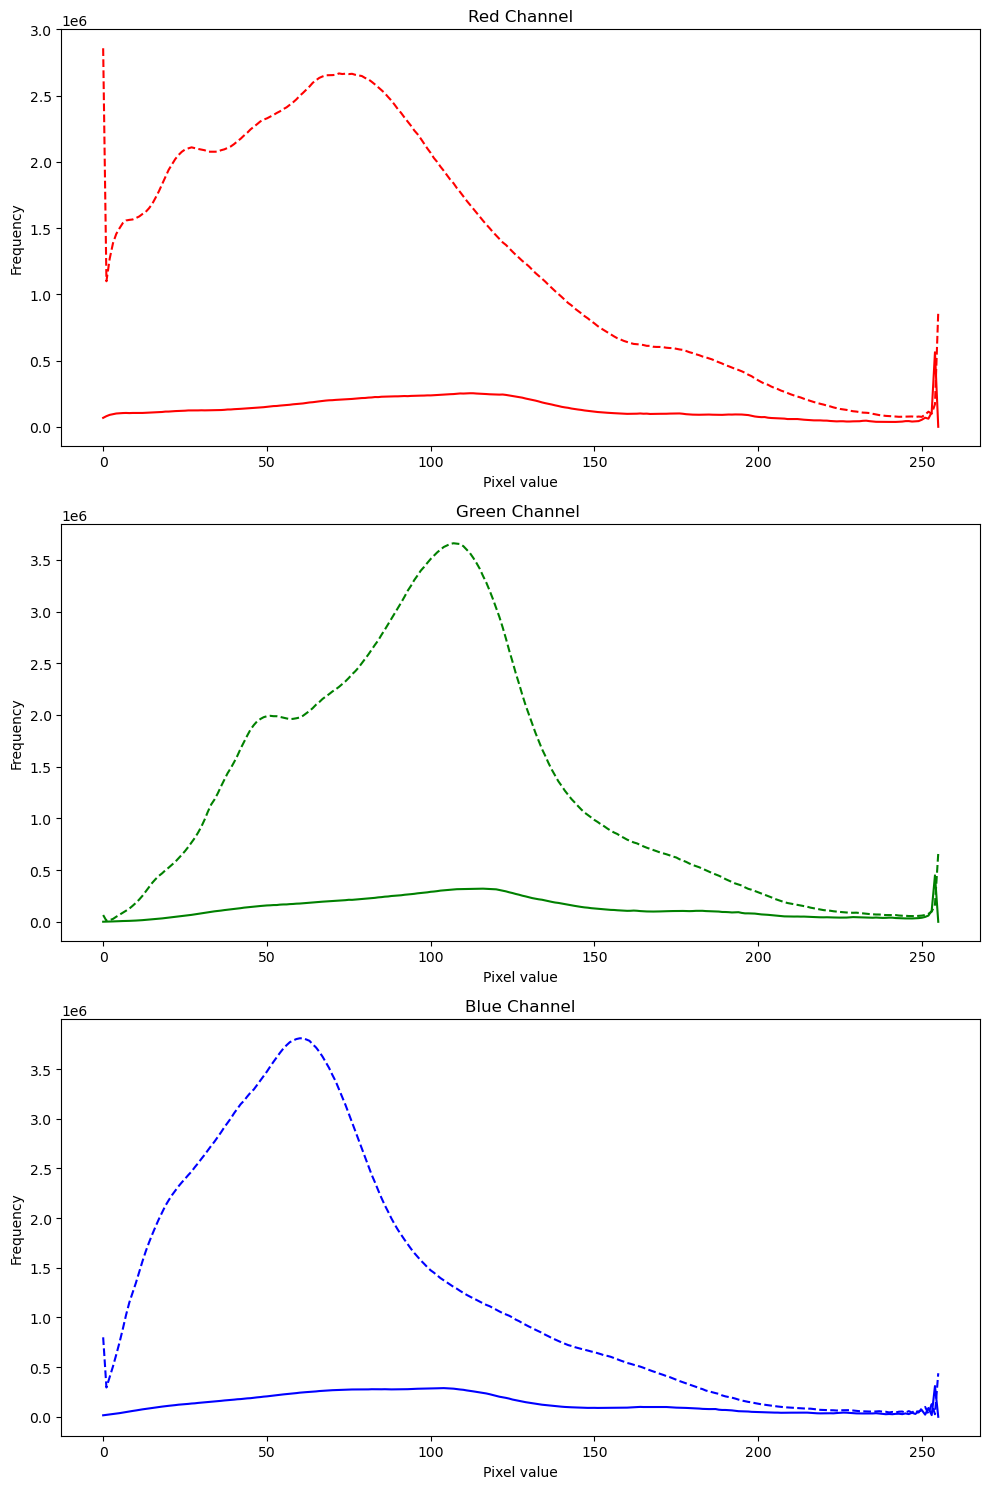

In [15]:
# Calculate histograms for each channel - label
hist_red_labels = np.histogram(filled_patches[..., 0], bins=256, range=(1, 256))[0] # Change ranged here so that we do not look at the black pixels
hist_green_labels = np.histogram(filled_patches[..., 1], bins=256, range=(1, 256))[0]
hist_blue_labels = np.histogram(filled_patches[..., 2], bins=256, range=(1, 256))[0]

# Calculate histograms for each channel - full
hist_red_patches = np.histogram(patches[..., 0], bins=256, range=(0, 256))[0]
hist_green_patches = np.histogram(patches[..., 1], bins=256, range=(0, 256))[0]
hist_blue_patches = np.histogram(patches[..., 2], bins=256, range=(0, 256))[0]

# Plot the histograms using subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(hist_red_labels, color='red')
axs[0].plot(hist_red_patches, color='red', linestyle='dashed')    
axs[0].set_title('Red Channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')

axs[1].plot(hist_green_labels, color='green')
axs[1].plot(hist_green_patches, color='green', linestyle='dashed')
axs[1].set_title('Green Channel ')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')

axs[2].plot(hist_blue_labels, color='blue')
axs[2].plot(hist_blue_patches, color='blue', linestyle='dashed')
axs[2].set_title('Blue Channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# t-SNE on the patches 

In [9]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [10]:
flattened_patches = patches.reshape(patches.shape[0], -1)
flattened_labels = filled_patches.reshape(filled_patches.shape[0], -1)

In [11]:
flattened_patches_df = pd.DataFrame(flattened_patches)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_labels = tsne.fit_transform(flattened_labels)